# Credit EDA Case Study

## Introduction
This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

# Import Libraries

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

# Loading The Data

In [3]:
ApplicationData = pd.read_csv('application_data.csv')


### Inspecting The Dataframe

In [4]:
###   checking all columns summary 
ApplicationData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [89]:
###  checking data types of columns
ApplicationData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   TARGET                       307511 non-null  int64   
 1   AMT_INCOME_TOTAL             307511 non-null  float64 
 2   AMT_GOODS_PRICE              307511 non-null  category
 3   AMT_ANNUITY                  307511 non-null  float64 
 4   AMT_CREDIT                   307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   OCCUPATION_TYPE              307511 non-null  object  
 7   LIVE_CITY_NOT_WORK_CITY      307511 non-null  int64   
 8   LIVE_REGION_NOT_WORK_REGION  307511 non-null  int64   
 9   NAME_INCOME_TYPE             307511 non-null  object  
 10  NAME_TYPE_SUITE              307511 non-null  object  
dtypes: category(2), float64(2), int64(4), object(3)
memory usage: 21.7+ MB


In [6]:
## checking all top 5 rows
ApplicationData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
##  checking all bottom 5 columns
ApplicationData.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

# Making new dataframe for analysis on application data file

In [8]:
###  make new dataframe 
ApplicationData = ApplicationData[['TARGET','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_CREDIT','CNT_CHILDREN','OCCUPATION_TYPE','LIVE_CITY_NOT_WORK_CITY','LIVE_REGION_NOT_WORK_REGION','NAME_INCOME_TYPE','NAME_TYPE_SUITE',]]

In [9]:
ApplicationData.head()

,TARGET,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CNT_CHILDREN,OCCUPATION_TYPE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_INCOME_TYPE,NAME_TYPE_SUITE
0,1,202500.0,351000.0,24700.5,406597.5,0,Laborers,0,0,Working,Unaccompanied
1,0,270000.0,1129500.0,35698.5,1293502.5,0,Core staff,0,0,State servant,Family
2,0,67500.0,135000.0,6750.0,135000.0,0,Laborers,0,0,Working,Unaccompanied
3,0,135000.0,297000.0,29686.5,312682.5,0,Laborers,0,0,Working,Unaccompanied
4,0,121500.0,513000.0,21865.5,513000.0,0,Core staff,1,0,Working,Unaccompanied


## dealing with null values

In [10]:
## checking amount of null values in dataframe
ApplicationData.isnull().sum()

TARGET                             0
AMT_INCOME_TOTAL                   0
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
AMT_CREDIT                         0
CNT_CHILDREN                       0
OCCUPATION_TYPE                96391
LIVE_CITY_NOT_WORK_CITY            0
LIVE_REGION_NOT_WORK_REGION        0
NAME_INCOME_TYPE                   0
NAME_TYPE_SUITE                 1292
dtype: int64

In [11]:
###  using this method for finding % of null values, so i can decide either drop or replace
percent_missing = ApplicationData.isnull().sum() * 100 / len(ApplicationData)
percent_missing

TARGET                          0.000000
AMT_INCOME_TOTAL                0.000000
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
AMT_CREDIT                      0.000000
CNT_CHILDREN                    0.000000
OCCUPATION_TYPE                31.345545
LIVE_CITY_NOT_WORK_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
NAME_INCOME_TYPE                0.000000
NAME_TYPE_SUITE                 0.420148
dtype: float64

In [12]:
###  chcked which values are missing
ApplicationData[ApplicationData['AMT_ANNUITY'].isnull()].head()

,TARGET,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CNT_CHILDREN,OCCUPATION_TYPE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_INCOME_TYPE,NAME_TYPE_SUITE
47531,0,180000.0,450000.0,NaN,450000.0,0,High skill tech staff,0,0,Commercial associate,Unaccompanied
50035,0,94500.0,450000.0,NaN,450000.0,0,Laborers,0,0,Working,Unaccompanied
51594,0,202500.0,450000.0,NaN,539100.0,0,Cooking staff,1,0,Working,Unaccompanied
55025,0,162000.0,225000.0,NaN,296280.0,0,Core staff,1,0,State servant,Unaccompanied
59934,0,202500.0,360000.0,NaN,360000.0,0,Laborers,1,1,Working,Unaccompanied


replace null values using mean:
    because percentage of missing null value is minimum.
    and mean will be effective way to handle int null value 

In [13]:
ApplicationData['AMT_GOODS_PRICE'].fillna(ApplicationData['AMT_GOODS_PRICE'].mean(),inplace=True)

In [14]:
ApplicationData['AMT_ANNUITY'].fillna(ApplicationData['AMT_ANNUITY'].mean(),inplace=True)

replace null values using mode: because percentage of missing null value is minimum. and mode will be effective way to handle string null value

In [15]:
ApplicationData['NAME_TYPE_SUITE'].fillna(ApplicationData['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [16]:
ApplicationData['OCCUPATION_TYPE'].fillna(ApplicationData['OCCUPATION_TYPE'].mode()[0],inplace=True)

In [17]:
###  After effect of handling null values
ApplicationData.isnull().sum()

TARGET                         0
AMT_INCOME_TOTAL               0
AMT_GOODS_PRICE                0
AMT_ANNUITY                    0
AMT_CREDIT                     0
CNT_CHILDREN                   0
OCCUPATION_TYPE                0
LIVE_CITY_NOT_WORK_CITY        0
LIVE_REGION_NOT_WORK_REGION    0
NAME_INCOME_TYPE               0
NAME_TYPE_SUITE                0
dtype: int64

## dealing with outliner

In [18]:
ApplicationData.head()

,TARGET,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CNT_CHILDREN,OCCUPATION_TYPE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_INCOME_TYPE,NAME_TYPE_SUITE
0,1,202500.0,351000.0,24700.5,406597.5,0,Laborers,0,0,Working,Unaccompanied
1,0,270000.0,1129500.0,35698.5,1293502.5,0,Core staff,0,0,State servant,Family
2,0,67500.0,135000.0,6750.0,135000.0,0,Laborers,0,0,Working,Unaccompanied
3,0,135000.0,297000.0,29686.5,312682.5,0,Laborers,0,0,Working,Unaccompanied
4,0,121500.0,513000.0,21865.5,513000.0,0,Core staff,1,0,Working,Unaccompanied


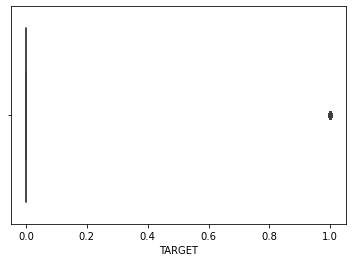

In [19]:
sns.boxplot(ApplicationData.TARGET)
plt.show()

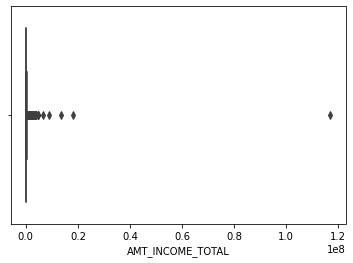

In [20]:
sns.boxplot(ApplicationData['AMT_INCOME_TOTAL'])
plt.show()

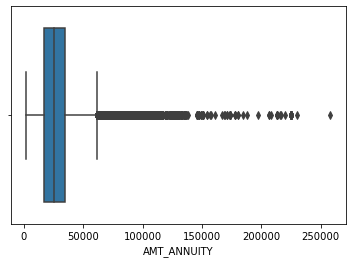

In [21]:
sns.boxplot(ApplicationData['AMT_ANNUITY'])
plt.show()

In [96]:
median = np.median(ApplicationData['AMT_ANNUITY'])
upper_quartile = np.percentile(ApplicationData['AMT_ANNUITY'], 75)
lower_quartile = np.percentile(ApplicationData['AMT_ANNUITY'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = ApplicationData['AMT_ANNUITY'][ApplicationData['AMT_ANNUITY']<=upper_quartile+1.5*iqr].max()
lower_whisker = ApplicationData['AMT_ANNUITY'][ApplicationData['AMT_ANNUITY']>=lower_quartile-1.5*iqr].min()

In [97]:
print(upper_whisker)
print(lower_whisker)

61699.5
1615.5


### in above box plots there are some outliner but as my perspective in amt section outliners are possible and dont need to work on it

In [22]:
##  now we need to check how much unique values in it 
ApplicationData.nunique()

TARGET                             2
AMT_INCOME_TOTAL                2548
AMT_GOODS_PRICE                 1003
AMT_ANNUITY                    13673
AMT_CREDIT                      5603
CNT_CHILDREN                      15
OCCUPATION_TYPE                   18
LIVE_CITY_NOT_WORK_CITY            2
LIVE_REGION_NOT_WORK_REGION        2
NAME_INCOME_TYPE                   8
NAME_TYPE_SUITE                    7
dtype: int64

In [23]:
##  this operation for checking any xna or negative value.

print(ApplicationData['AMT_INCOME_TOTAL'].unique()) 
print(ApplicationData['AMT_GOODS_PRICE'].unique())    
print(ApplicationData['AMT_ANNUITY'].unique())   
print(ApplicationData['AMT_CREDIT'].unique()) 
print(ApplicationData['CNT_CHILDREN'].unique())    
print(ApplicationData['OCCUPATION_TYPE'].unique())  
print(ApplicationData['LIVE_CITY_NOT_WORK_CITY'].unique()) 
print(ApplicationData['LIVE_REGION_NOT_WORK_REGION'].unique())    
print(ApplicationData['NAME_INCOME_TYPE'].unique())  
print(ApplicationData['NAME_TYPE_SUITE'].unique())  


[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
[0 1]
[0 1]
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']


## Binning of continuous variables

### this operation runs for analyze the frequency of quantitative data grouped into categories

In [24]:
ApplicationData.head()

,TARGET,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CNT_CHILDREN,OCCUPATION_TYPE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_INCOME_TYPE,NAME_TYPE_SUITE
0,1,202500.0,351000.0,24700.5,406597.5,0,Laborers,0,0,Working,Unaccompanied
1,0,270000.0,1129500.0,35698.5,1293502.5,0,Core staff,0,0,State servant,Family
2,0,67500.0,135000.0,6750.0,135000.0,0,Laborers,0,0,Working,Unaccompanied
3,0,135000.0,297000.0,29686.5,312682.5,0,Laborers,0,0,Working,Unaccompanied
4,0,121500.0,513000.0,21865.5,513000.0,0,Core staff,1,0,Working,Unaccompanied


In [25]:
# Binning 'AMT_GOODS_PRICE' based on quantiles
ApplicationData['AMT_GOODS_PRICE'] = pd.qcut(ApplicationData.AMT_GOODS_PRICE, q=[0, 0.25, 0.5, 0.75, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
ApplicationData['AMT_GOODS_PRICE'].head()

0         LOW
1        HIGH
2    VERY_LOW
3         LOW
4      MEDIUM
Name: AMT_GOODS_PRICE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [26]:
# Binning 'AMT_CREDIT' based on quantiles
ApplicationData['AMT_CREDIT'] = pd.qcut(ApplicationData.AMT_CREDIT, q=[0, 0.25, 0.5, 0.75, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
ApplicationData['AMT_CREDIT'].head()

0         LOW
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: AMT_CREDIT, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

# Analysis on selected dataframe 

In [27]:
ApplicationData.head()

,TARGET,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CNT_CHILDREN,OCCUPATION_TYPE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_INCOME_TYPE,NAME_TYPE_SUITE
0,1,202500.0,LOW,24700.5,LOW,0,Laborers,0,0,Working,Unaccompanied
1,0,270000.0,HIGH,35698.5,HIGH,0,Core staff,0,0,State servant,Family
2,0,67500.0,VERY_LOW,6750.0,VERY_LOW,0,Laborers,0,0,Working,Unaccompanied
3,0,135000.0,LOW,29686.5,LOW,0,Laborers,0,0,Working,Unaccompanied
4,0,121500.0,MEDIUM,21865.5,LOW,0,Core staff,1,0,Working,Unaccompanied


## univariate analysis

### Categorical unordered univariate analysis

In [28]:
#calculate the percentage of each OCCUPATION_TYPE category. 

ApplicationData.CNT_CHILDREN.value_counts(normalize=True)

0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
8     0.000007
9     0.000007
12    0.000007
10    0.000007
19    0.000007
11    0.000003
Name: CNT_CHILDREN, dtype: float64

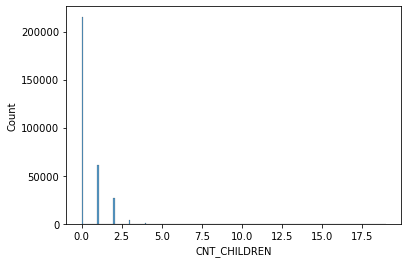

In [99]:
sns.histplot(A pplicationData['CNT_CHILDREN'], bins = 250)
plt.show()

in above plot we can see CNT of children 0 and 1 is greater

In [30]:
#calculate the percentage of each NAME_INCOME_TYPE category. 

ApplicationData.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

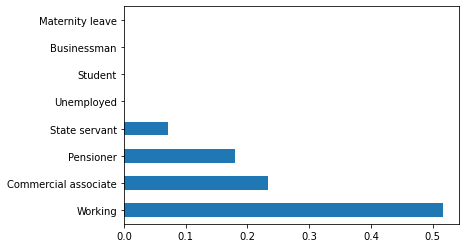

In [31]:
#plot the bar graph of percentage AMT_CREDIT categories
ApplicationData.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

#### in above operation we can understand most people's are working, commercial associate pensioners and state servant

Laborers                 0.492916
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


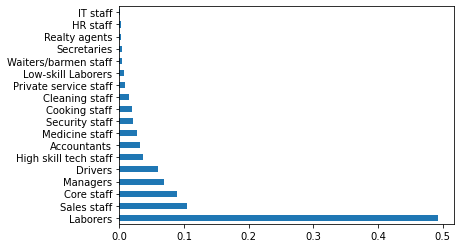

In [32]:
#calculate the percentage of each OCCUPATION_TYPE  category.
print(ApplicationData.OCCUPATION_TYPE.value_counts(normalize=True))
#plot the bar graph of percentage NAME_INCOME_TYPE categories
ApplicationData.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

#### in above operation we can understand most of peoples are laborers who are applied for loan and after that most of staff members

### Categorical ordered univariate analysis

In [33]:
ApplicationData.head()

,TARGET,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CNT_CHILDREN,OCCUPATION_TYPE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_INCOME_TYPE,NAME_TYPE_SUITE
0,1,202500.0,LOW,24700.5,LOW,0,Laborers,0,0,Working,Unaccompanied
1,0,270000.0,HIGH,35698.5,HIGH,0,Core staff,0,0,State servant,Family
2,0,67500.0,VERY_LOW,6750.0,VERY_LOW,0,Laborers,0,0,Working,Unaccompanied
3,0,135000.0,LOW,29686.5,LOW,0,Laborers,0,0,Working,Unaccompanied
4,0,121500.0,MEDIUM,21865.5,LOW,0,Core staff,1,0,Working,Unaccompanied


In [1]:
#calculate the percentage of each AMT_CREDIT category.
print(ApplicationData.AMT_CREDIT.value_counts(normalize=True))

#plot the pie chart of AMT_CREDIT categories
ApplicationData.AMT_CREDIT.value_counts(normalize=True).plot.pie(shadow = True,autopct = '%1.0f%%')
plt.show()

NameError: name 'ApplicationData' is not defined

VERY_LOW     0.259753
LOW          0.253981
MEDIUM       0.240635
HIGH         0.196152
VERY_HIGH    0.049478
Name: AMT_GOODS_PRICE, dtype: float64


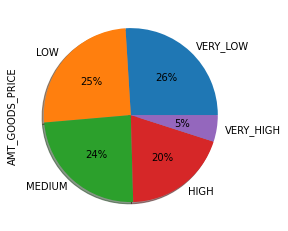

In [35]:
#calculate the percentage of each NAME_FAMILY_STATUS category.
print(ApplicationData.AMT_GOODS_PRICE.value_counts(normalize=True))

#plot the pie chart of NAME_FAMILY_STATUS categories
ApplicationData.AMT_GOODS_PRICE.value_counts(normalize=True).plot.pie(shadow = True,autopct = '%1.0f%%')
plt.show()

from above operation we can understand 'AMT_GOODS_PRICE' and 'AMT_CREDIT' are near to same

0    0.919271
1    0.080729
Name: TARGET, dtype: float64


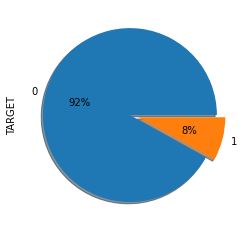

In [36]:
#calculate the percentage of each TARGET category.
print(ApplicationData.TARGET.value_counts(normalize=True))

ApplicationData.TARGET.value_counts(normalize=True).plot.pie(explode =[0,0.1],shadow = True,autopct = '%1.0f%%')#plot the pie chart of response categories
plt.show()

In this pie we can understand there is only 0.8 % are defaulters.
The imbalance is high between target variables.

## Bivariate and Multivariate Analysis

### Numeric- numeric analysis

In [37]:
ApplicationData.head()

,TARGET,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CNT_CHILDREN,OCCUPATION_TYPE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_INCOME_TYPE,NAME_TYPE_SUITE
0,1,202500.0,LOW,24700.5,LOW,0,Laborers,0,0,Working,Unaccompanied
1,0,270000.0,HIGH,35698.5,HIGH,0,Core staff,0,0,State servant,Family
2,0,67500.0,VERY_LOW,6750.0,VERY_LOW,0,Laborers,0,0,Working,Unaccompanied
3,0,135000.0,LOW,29686.5,LOW,0,Laborers,0,0,Working,Unaccompanied
4,0,121500.0,MEDIUM,21865.5,LOW,0,Core staff,1,0,Working,Unaccompanied


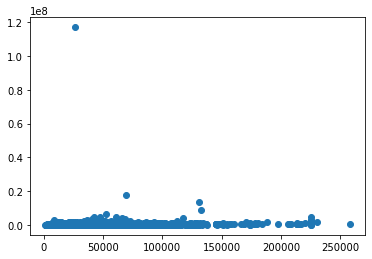

In [38]:
#plot the scatter plot of AMT_ANNUITY and AMT_INCOME_TOTAL variable in ApplicationData
plt.scatter(ApplicationData.AMT_ANNUITY, ApplicationData.AMT_INCOME_TOTAL)
plt.show()

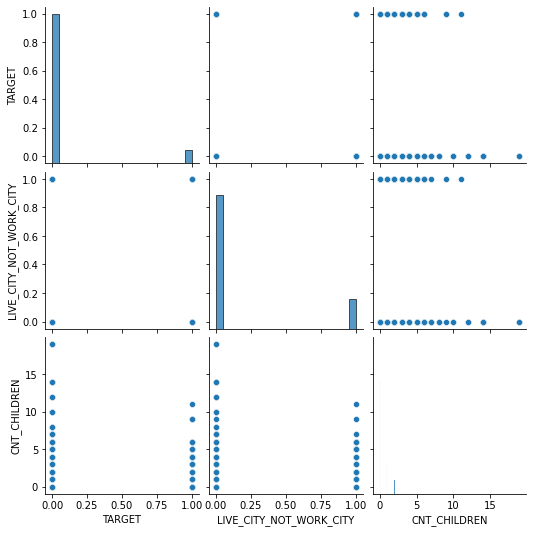

In [39]:
## For visualisation of multiple variable
sns.pairplot(data=ApplicationData, vars=['TARGET', 'LIVE_CITY_NOT_WORK_CITY', 'CNT_CHILDREN'])
plt.show()

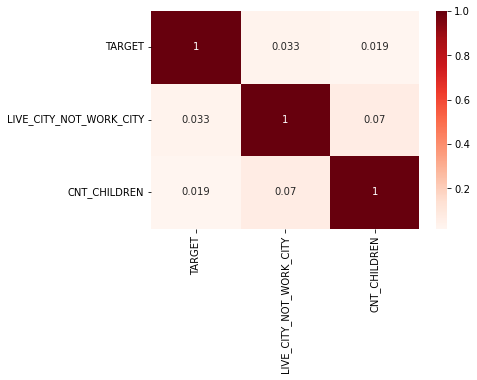

In [40]:
###  gets a visualisation of the numeric data.
sns.heatmap(ApplicationData[['TARGET', 'LIVE_CITY_NOT_WORK_CITY', 'CNT_CHILDREN']].corr(), annot=True, cmap='Reds')
plt.show()

We observe that there is a high correlation between Target and CNT children. There appears to be some deviancies in the correlation of Loan-Payment Difficulties and Loan- Non Payment Difficulties such as credit amount v/s CNT children.

### Numerical categorical variable

TARGET
0    169077.722266
1    165611.760906
Name: AMT_INCOME_TOTAL, dtype: float64


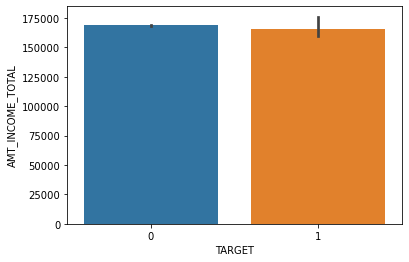

In [41]:
print(ApplicationData.groupby('TARGET')['AMT_INCOME_TOTAL'].mean())

#plot the box plot for 0 & 1 target.
sns.barplot(data=ApplicationData,x= 'TARGET', y='AMT_INCOME_TOTAL')
plt.show()

### Multivariate analysis

In [42]:
ApplicationData.head()

,TARGET,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CNT_CHILDREN,OCCUPATION_TYPE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_INCOME_TYPE,NAME_TYPE_SUITE
0,1,202500.0,LOW,24700.5,LOW,0,Laborers,0,0,Working,Unaccompanied
1,0,270000.0,HIGH,35698.5,HIGH,0,Core staff,0,0,State servant,Family
2,0,67500.0,VERY_LOW,6750.0,VERY_LOW,0,Laborers,0,0,Working,Unaccompanied
3,0,135000.0,LOW,29686.5,LOW,0,Laborers,0,0,Working,Unaccompanied
4,0,121500.0,MEDIUM,21865.5,LOW,0,Core staff,1,0,Working,Unaccompanied


I used pivot table to summarize numeric variable based on two other categorical variables.

In [43]:
MultivariateAnalysis = pd.pivot_table(data=ApplicationData, index='OCCUPATION_TYPE', columns='AMT_CREDIT', values='TARGET')
MultivariateAnalysis

AMT_CREDIT,VERY_LOW,LOW,MEDIUM,HIGH,VERY_HIGH
OCCUPATION_TYPE,,,,,
Accountants,0.041845,0.053871,0.057610,0.049612,0.017986
Cleaning staff,0.087021,0.118401,0.096747,0.078273,0.016129
Cooking staff,0.093902,0.128091,0.113806,0.077543,0.039062
Core staff,0.056751,0.073709,0.075989,0.051201,0.037807
Drivers,0.100873,0.134016,0.132670,0.088161,0.058458
HR staff,0.067797,0.088889,0.053030,0.039062,0.080000
High skill tech staff,0.055619,0.075617,0.072873,0.048132,0.035294
IT staff,0.043478,0.072000,0.135135,0.017857,0.050000
Laborers,0.069282,0.094872,0.088995,0.069684,0.047937


<AxesSubplot:xlabel='AMT_CREDIT', ylabel='OCCUPATION_TYPE'>

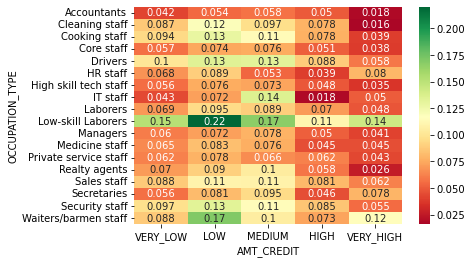

In [44]:
sns.heatmap(MultivariateAnalysis, annot=True, cmap='RdYlGn',center = 0.117)

# Data Analysis on Previous Application data

In [45]:
PreviousApplication = pd.read_csv('previous_application.csv')

In [46]:
PreviousApplication.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Making new data frame for analysis on previous application file

In [47]:
###  seleted specific columns for analysis
PreviousApplication =PreviousApplication[ ['SK_ID_PREV','SK_ID_CURR','AMT_APPLICATION','AMT_CREDIT','PRODUCT_COMBINATION','NAME_CONTRACT_TYPE','NAME_GOODS_CATEGORY','NAME_SELLER_INDUSTRY','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE']]

In [48]:
PreviousApplication

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE
0,2030495,271877,17145.0,17145.0,POS mobile with interest,Consumer loans,Mobile,Connectivity,Cash through the bank,Repeater
1,2802425,108129,607500.0,679671.0,Cash X-Sell: low,Cash loans,XNA,XNA,XNA,Repeater
2,2523466,122040,112500.0,136444.5,Cash X-Sell: high,Cash loans,XNA,XNA,Cash through the bank,Repeater
3,2819243,176158,450000.0,470790.0,Cash X-Sell: middle,Cash loans,XNA,XNA,Cash through the bank,Repeater
4,1784265,202054,337500.0,404055.0,Cash Street: high,Cash loans,XNA,XNA,Cash through the bank,Repeater
...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,267295.5,311400.0,POS industry with interest,Consumer loans,Furniture,Furniture,Cash through the bank,Refreshed
1670210,2357031,334635,87750.0,64291.5,POS industry with interest,Consumer loans,Furniture,Furniture,Cash through the bank,New
1670211,2659632,249544,105237.0,102523.5,POS household with interest,Consumer loans,Consumer Electronics,Consumer electronics,Cash through the bank,Repeater
1670212,2785582,400317,180000.0,191880.0,Cash X-Sell: low,Cash loans,XNA,XNA,Cash through the bank,Repeater


In [49]:
PreviousApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1670214 non-null  int64  
 1   SK_ID_CURR            1670214 non-null  int64  
 2   AMT_APPLICATION       1670214 non-null  float64
 3   AMT_CREDIT            1670213 non-null  float64
 4   PRODUCT_COMBINATION   1669868 non-null  object 
 5   NAME_CONTRACT_TYPE    1670214 non-null  object 
 6   NAME_GOODS_CATEGORY   1670214 non-null  object 
 7   NAME_SELLER_INDUSTRY  1670214 non-null  object 
 8   NAME_PAYMENT_TYPE     1670214 non-null  object 
 9   NAME_CLIENT_TYPE      1670214 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 127.4+ MB


## Dealing with null values

checking XNA values in data frame

In [50]:
print(PreviousApplication['NAME_GOODS_CATEGORY'].unique())
print(PreviousApplication['NAME_SELLER_INDUSTRY'].unique())
print(PreviousApplication['NAME_PAYMENT_TYPE'].unique())
print(PreviousApplication['NAME_CLIENT_TYPE'].unique())


['Mobile' 'XNA' 'Consumer Electronics' 'Construction Materials'
 'Auto Accessories' 'Photo / Cinema Equipment' 'Computers' 'Audio/Video'
 'Medicine' 'Clothing and Accessories' 'Furniture' 'Sport and Leisure'
 'Homewares' 'Gardening' 'Jewelry' 'Vehicles' 'Education'
 'Medical Supplies' 'Other' 'Direct Sales' 'Office Appliances' 'Fitness'
 'Tourism' 'Insurance' 'Additional Service' 'Weapon' 'Animals'
 'House Construction']
['Connectivity' 'XNA' 'Consumer electronics' 'Industry' 'Clothing'
 'Furniture' 'Construction' 'Jewelry' 'Auto technology' 'MLM partners'
 'Tourism']
['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']
['Repeater' 'New' 'Refreshed' 'XNA']


In [51]:
# XNA replaced by NaN
PreviousApplication=PreviousApplication.replace('XNA', np.NaN)


There is some XNA values in data frame we should remove it

Percentage of missing values are high that's why need to drop

# Analysis on selected dataframe

In [63]:
PreviousApplication.head()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE
0,2030495,271877,17145.0,17145.0,POS mobile with interest,Consumer loans,Mobile,Connectivity,Cash through the bank,Repeater
13,1397919,321676,53779.5,57564.0,POS household without interest,Consumer loans,Consumer Electronics,Consumer electronics,Cash through the bank,New
14,2273188,270658,26550.0,27252.0,POS household with interest,Consumer loans,Construction Materials,Consumer electronics,Cash through the bank,New
15,1232483,151612,126490.5,119853.0,POS other with interest,Consumer loans,Auto Accessories,Industry,Cash through the bank,New
16,2163253,154602,26955.0,27297.0,POS household with interest,Consumer loans,Photo / Cinema Equipment,Consumer electronics,Cash through the bank,Repeater


## Univariate Analysis

### Categorical unordered univariate analysis

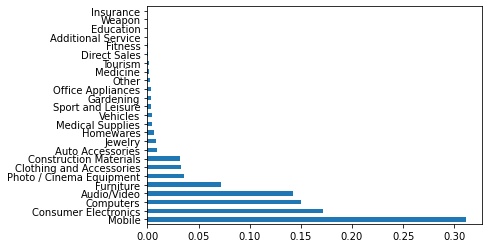

In [64]:
#calculate the percentage of each NAME_GOODS_CATEGORY status category.
PreviousApplication.NAME_GOODS_CATEGORY.value_counts(normalize=True)

#plot the bar graph of percentage NAME_GOODS_CATEGORY categories
PreviousApplication.NAME_GOODS_CATEGORY.value_counts(normalize=True).plot.barh()
plt.show()

we can see mobile sector is on peak

### Categorical ordered univariate analysis

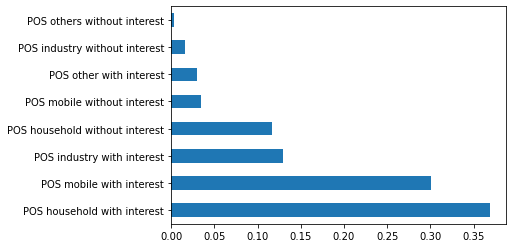

In [94]:
PreviousApplication.PRODUCT_COMBINATION.value_counts(normalize=True)

#plot the bar graph of percentage PRODUCT_COMBINATION categories
PreviousApplication.PRODUCT_COMBINATION.value_counts(normalize=True).plot.barh()
plt.show()

we can observ POS household with interest most growing section

## Bivariate and Multivariate Analysis

### Numeric- numeric analysis

In [67]:
PreviousApplication.head()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE
0,2030495,271877,17145.0,17145.0,POS mobile with interest,Consumer loans,Mobile,Connectivity,Cash through the bank,Repeater
13,1397919,321676,53779.5,57564.0,POS household without interest,Consumer loans,Consumer Electronics,Consumer electronics,Cash through the bank,New
14,2273188,270658,26550.0,27252.0,POS household with interest,Consumer loans,Construction Materials,Consumer electronics,Cash through the bank,New
15,1232483,151612,126490.5,119853.0,POS other with interest,Consumer loans,Auto Accessories,Industry,Cash through the bank,New
16,2163253,154602,26955.0,27297.0,POS household with interest,Consumer loans,Photo / Cinema Equipment,Consumer electronics,Cash through the bank,Repeater


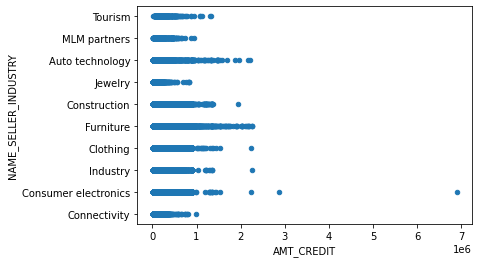

In [68]:
PreviousApplication.plot.scatter(x='AMT_CREDIT',y='NAME_SELLER_INDUSTRY')
plt.show()

in this map we can see the people has furniture and auto technology has high level of amount of credit

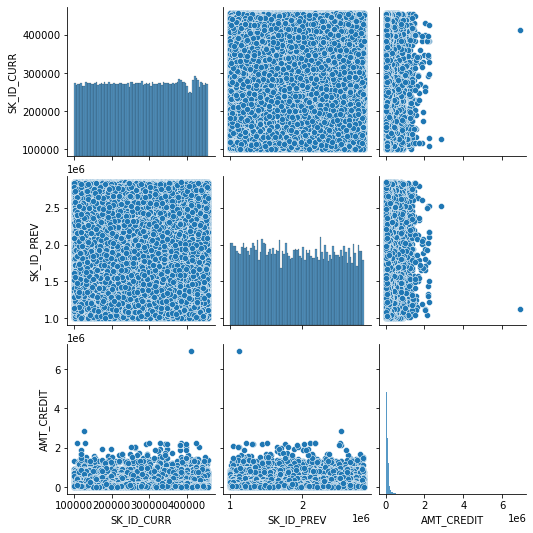

In [69]:
sns.pairplot(data=PreviousApplication, vars=['SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT'])
plt.show()

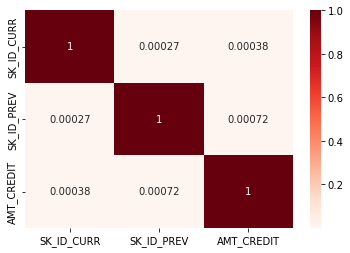

In [70]:
sns.heatmap(PreviousApplication[['SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT']].corr(), annot=True, cmap='Reds')
plt.show()

We observe that there is a high correlation between SK_ID_CURR and AMT_CREDIT. There appears to be some deviancies in the correlation of Loan-Payment Difficulties and Loan- Non Payment Difficulties such as SK_ID_CURR v/s AMT_CREDIT.

### Numerical categorical variable

In [73]:
#groupby the response to find the median of the AMT_APPLICATION with NAME_CLIENT_TYPE Repeater, New client and Refreshed seperatly.
PreviousApplication.groupby('NAME_CLIENT_TYPE')['AMT_APPLICATION'].median()

NAME_CLIENT_TYPE
New          67455.0
Refreshed    76455.0
Repeater     68940.0
Name: AMT_APPLICATION, dtype: float64

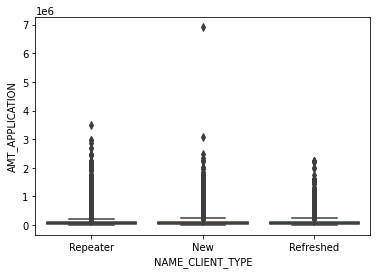

In [76]:
#plot the box plot of AMT_APPLICATION with NAME_CLIENT_TYPE Repeater, New client and Refreshed.
sns.boxplot(data=PreviousApplication,x= 'NAME_CLIENT_TYPE', y='AMT_APPLICATION')
plt.show()

### Categorical categorical variable

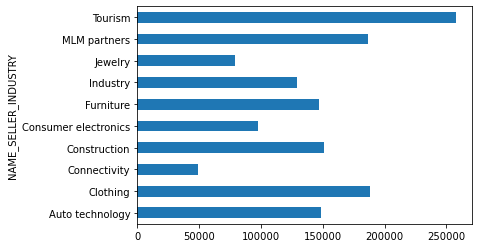

In [95]:
#plot the bar graph of NAME_SELLER_INDUSTRY with AMT_CREDIT
PreviousApplication.groupby(['NAME_SELLER_INDUSTRY'])['AMT_CREDIT'].mean().plot.barh()
plt.show()

in this graph we can understand tourism required more amount of credit

### Multivariate analysis

In [79]:
PreviousApplication.head()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE,NAME_GOODS_CATEGORY,NAME_SELLER_INDUSTRY,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE
0,2030495,271877,17145.0,17145.0,POS mobile with interest,Consumer loans,Mobile,Connectivity,Cash through the bank,Repeater
13,1397919,321676,53779.5,57564.0,POS household without interest,Consumer loans,Consumer Electronics,Consumer electronics,Cash through the bank,New
14,2273188,270658,26550.0,27252.0,POS household with interest,Consumer loans,Construction Materials,Consumer electronics,Cash through the bank,New
15,1232483,151612,126490.5,119853.0,POS other with interest,Consumer loans,Auto Accessories,Industry,Cash through the bank,New
16,2163253,154602,26955.0,27297.0,POS household with interest,Consumer loans,Photo / Cinema Equipment,Consumer electronics,Cash through the bank,Repeater


In [86]:
prev = pd.pivot_table(data=PreviousApplication, index='PRODUCT_COMBINATION', columns='NAME_SELLER_INDUSTRY', values='AMT_CREDIT')
prev

NAME_SELLER_INDUSTRY,Auto technology,Clothing,Connectivity,Construction,Consumer electronics,Furniture,Industry,Jewelry,MLM partners,Tourism
PRODUCT_COMBINATION,,,,,,,,,,
POS household with interest,108530.911765,56164.125000,44594.468824,175321.977876,93018.972306,118991.790537,133018.027397,22050.000000,NaN,NaN
POS household without interest,61825.500000,NaN,49662.214286,94033.384615,113034.434148,142109.027027,136843.500000,NaN,NaN,NaN
POS industry with interest,196952.048780,188734.208144,211373.785714,147962.154405,142247.557783,138907.826904,127337.123537,75195.964286,189454.950000,184185.195652
POS industry without interest,445500.000000,190916.176193,NaN,140788.286982,89381.743902,203192.830616,122872.253636,75914.483603,263169.000000,NaN
POS mobile with interest,41237.357143,27648.000000,46967.383321,183540.600000,94097.631965,69791.062500,57819.150000,NaN,NaN,NaN
POS mobile without interest,108436.500000,NaN,66748.766740,NaN,121614.459930,NaN,NaN,NaN,211050.000000,NaN
POS other with interest,148736.495443,164877.915584,48378.717391,178341.075000,91769.287179,172139.804622,132309.063106,86945.054559,183497.361702,262566.766216
POS others without interest,92353.500000,219397.500000,87039.000000,171979.485577,94429.016129,192840.260870,120269.562607,69921.542574,187942.931507,NaN


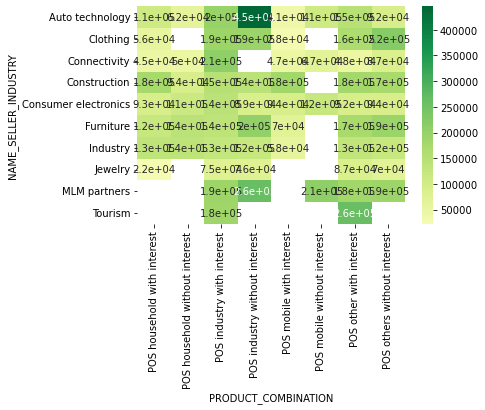

In [88]:
prev = pd.pivot_table(data=PreviousApplication, index='NAME_SELLER_INDUSTRY', columns='PRODUCT_COMBINATION', values='AMT_CREDIT')
sns.heatmap(prev, annot=True, cmap='RdYlGn',center = 0.117)
plt.show()